<a href="https://colab.research.google.com/github/tortotubus/JupyterNotebooks/blob/main/E_Field.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

If the potential $V$ is known as a function of the coordinates $x$, $y$, and $z$, then the components of the electric field $\vec{E}$ at any point are given by the partial derivatives of $V$.

$$\vec{E}=-\left(\hat{i}\frac{\partial V}{\partial x}+\hat{j}\frac{\partial V}{\partial y}+\hat{k}\frac{\partial V}{\partial z}\right)$$

<p>Voltage due to a point charge is given by the following equation:</p>

$$V(r)=\frac{1}{4\pi\epsilon_0}\frac{q}{r}$$

<p>As a function of $x$, $y$, and $z$ for a point charge located at $(a,b,c)$:</p>

$$V(x, y, z)=\frac{1}{4\pi\epsilon_0}\frac{q}{\sqrt{(a-x)^2+(b-y)^2+(c-z)^2}}$$

$$V(x, y, z)=k\frac{q}{\sqrt{(a-x)^2+(b-y)^2+(c-z)^2}}$$

<p>Where $k=8.9875517923\times10^9\:N\cdot m\cdot C^{-2}$:</p>

$$V(x, y, z)\approx9\times10^9\frac{q}{\sqrt{(a-x)^2+(b-y)^2+(c-z)^2}}$$

To create a field with multiple electrons, simply summate the left part of the function for each charge

$$V(x, y, x)\approx9\times10^9\sum_i{\frac{q_i}{\sqrt{(a_i-x)^2+(b_i-y)^2+(c_i-z)^2}}}$$



In [3]:
import numpy as np
from IPython.display import HTML
from sympy import symbols, diff

First, let us find the necessary partials:

In [229]:
x, y, a, b, k, q = symbols('x y a b k q', real=True)

r=np.power(np.power(a-x, 2) + np.power(b-y, 2), -1/2)
V = (k*q)*r

diff(V, x)

k*q*(1.0*a - 1.0*x)*((a - x)**2 + (b - y)**2)**(-1.5)

Now plot:

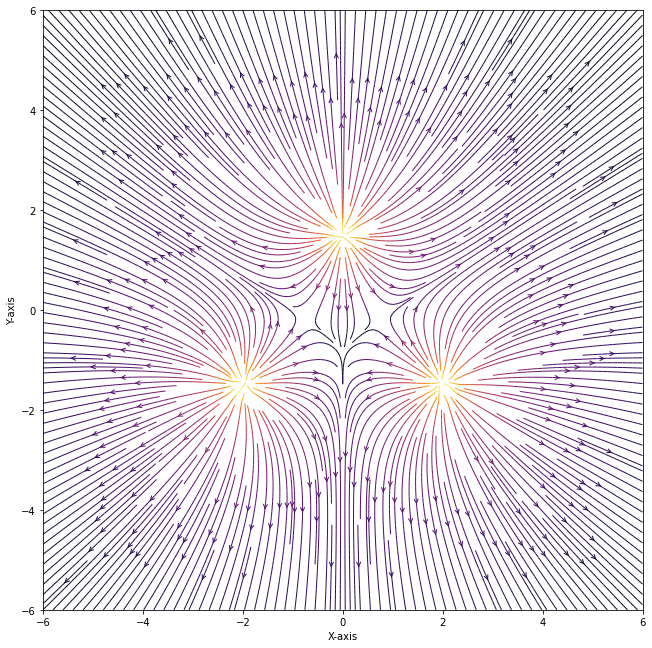

In [10]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import cm

steps = 50

x_max = 6
y_max = 6

x,y = np.meshgrid(np.linspace(-x_max,x_max,steps), np.linspace(-y_max,y_max,steps))

k = 9e9
q = 1.9e-19

a=-2
b=-1.5

c=2
d=-1.5

e=0
f=1.5

#Ex=diff(V,x)
#Ey=diff(V,y)

Ex = (k)*((-q*(a-x)*np.power((a-x)**2+(b-y)**2,-1.5))+(-q*(c-x)*np.power((c-x)**2+(d-y)**2,-1.5)+(-q*(e-x)*np.power((e-x)**2+(f-y)**2,-1.5))))
Ey = (k)*((-q*(b-y)*np.power((a-x)**2+(b-y)**2,-1.5))+(-q*(d-y)*np.power((c-x)**2+(d-y)**2,-1.5)+(-q*(f-y)*np.power((e-x)**2+(f-y)**2,-1.5))))

#Ex = (k)*((q*(a-x)*np.power((a-x)**2+(b-y)**2,-1.5))+(-q*(c-x)*np.power((c-x)**2+(d-y)**2,-1.5)))
#Ey = (k)*((q*(b-y)*np.power((a-x)**2+(b-y)**2,-1.5))+(-q*(d-y)*np.power((c-x)**2+(d-y)**2,-1.5)))

#Ex = (k)*((q*(a-x)*np.power((a-x)**2+(b-y)**2,-1.5)))
#Ey = (k)*((q*(b-y)*np.power((a-x)**2+(b-y)**2,-1.5)))


fig = plt.figure(figsize =(50, 50))
gs = gridspec.GridSpec(nrows = 3, ncols = 2,
                       height_ratios =[1, 1, 2])

ax = fig.add_subplot(gs[0, 1])

color = 2 * np.log(np.hypot(Ex, Ey))
strm = ax.streamplot(x, y, Ex, Ey, 
                     color=color, linewidth = 1, 
                     density = 4, arrowstyle ='->',
                     cmap = plt.cm.inferno)

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
#ax.set_xlim(-x_max, x_max)
#ax.set_ylim(-y_max, y_max)
ax.set_aspect('equal')

# show plot
plt.savefig('electron.png')  
plt.show()